<a href="https://colab.research.google.com/github/Apostolos-Rigas/bioinf_ABI102_project3/blob/apostolos/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

## Dataset Columns:

- Person ID: An identifier for each individual.

- Gender: The gender of the person (Male/Female).

- Age: The age of the person in years.

- Occupation: The occupation or profession of the person.

- Sleep Duration (hours): The number of hours the person sleeps per day.

- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

- Heart Rate (bpm): The resting heart rate of the person in beats per minute.

- Daily Steps: The number of steps the person takes per day.

- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

## Details about Sleep Disorder Column:

- None: The individual does not exhibit any specific sleep disorder.
- Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pointbiserialr, kruskal, f_oneway, chi2_contingency
import os
# from sklearn.impute import SimpleImputer

# Question 1

- Load the dataset into a pandas DataFrame. Display the first and last 5 rows.
- What is the shape of the dataset (rows, columns)?
- Display the data types of each column. Are there any columns with missing data?

In [8]:
from google.colab import drive
drive.mount('/content/drive')
#
# **********  ΑΛΛΑΓΗ ΓΙΑ ΟΠΟΙΟΝ ΑΛΛΑΖΕΙ ΑΥΤΟ ΤΟ ΑΡΧΕΙΟ  ***********************************************************************
#
# Θα πρέπει να ανεβάσετε το αρχείο της εκφώνησης με τα δεδομένα στο Google Drive σας
# και να βάλλετε στην επόμενη γραμμή την διεύθυνση προς τον φάκελο που βρίσκεται αυτο το αρχείο

folder_path = '/content/drive/MyDrive/Masters/Bioinformatics/EBI102_Biostatistics/Projects/Project_3' # APOSTOLOS
# folder_path = '/content/drive/MyDrive' # STEFANOS
# folder_path = '/content/drive/MyDrive' # XRYSA
os.chdir(folder_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv') # Load file to a DataFrame
# pd.set_option('display.max_columns', 13) # Enable showing of all (13) columns of data
df.shape # Display dimensions of DataFrame "matrix"

(374, 13)

In [10]:
df.head() # Display first 5 rows

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [11]:
df.tail() # Display last 5 rows

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [12]:
df.info(show_counts=True) # Display shape of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# Question 2
- Based on the context, what would you do with the missing values?
- Check for duplicate rows. If duplicates exist, remove them.

In [13]:
#

In [14]:
# APOSTOLOS
# duplicated_rows = df.duplicated() # Find rows that contain duplicate values
# num_of_duplicates = duplicated_rows.sum() # Find HOW MANY duplicate rows exist
# num_of_duplicates # Show total num of duplicates

In [ ]:
df[duplicated_rows] # Show duplicate rows

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


In [ ]:
df.drop_duplicates() # Remove duplicate rows

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Question 3
- What are the minimum and maximum values for each column?
- Analyze the distribution of a variable (e.g., Sleep Duration). You can analyze multiple variables and use histograms.

In [ ]:
df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [ ]:
# Pandas can apply the min() method only to columns that contain the same data type
# Thus, we have to treat seperately numeric and object (probably just string) columns

# Numeric minimums
numeric_min = df.select_dtypes(include=['number']).min()

# Lexicographic minimums for strings
string_columns = df.select_dtypes(include=['object']).applymap(str)
string_min = string_columns.select_dtypes(include=['object']).min()

# Combine results (optional)
combined_min = pd.concat([numeric_min, string_min])
combined_min # Show the result

<ipython-input-12-6a593aca90de>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  string_columns = df.select_dtypes(include=['object']).applymap(str)


,0
Person ID,1.0
Age,27.0
Sleep Duration,5.8
Quality of Sleep,4.0
Physical Activity Level,30.0
Stress Level,3.0
Heart Rate,65.0
Daily Steps,3000.0
Gender,Female
Occupation,Accountant


In [ ]:
for column_name in df.columns:

  column_num = df.columns.get_loc(column_name)

  if df[column_name].dtype in ['int64', 'float64']:

    min_value = df.at[0, column_name]
    pos_of_min = (0, 0)

    for row_index in df.index:

      row_num = df.index.get_loc(row_index)

      if df.iloc[row_num, column_num] < min_value:
        min_value = df.iloc[row_num, column_num]
        pos_of_min = (row_num, column_num)

    print(f"Minimum value in column '{df.columns[column_num]}' is {min_value} (at row {pos_of_min[0]})")
    # print(f"Full record: {df.iloc[row_num]}")


Minimum value in column 'Person ID' is 1 (at row 0)
Minimum value in column 'Age' is 27 (at row 0)
Minimum value in column 'Sleep Duration' is 5.8 (at row 80)
Minimum value in column 'Quality of Sleep' is 4 (at row 3)
Minimum value in column 'Physical Activity Level' is 30 (at row 3)
Minimum value in column 'Stress Level' is 3 (at row 50)
Minimum value in column 'Heart Rate' is 65 (at row 86)
Minimum value in column 'Daily Steps' is 3000 (at row 3)


In [ ]:
# df.max()

# Question 4
- Select a column from the DataFrame, such as 'age', and transform its values into a list. You can use the .tolist() method to transform a selected column into a list.
- Create a function count_occurences() to count the occurrences of unique values in the list. The function should return each unique value as a key, with each key having the occurences.
- Create a function linear_search which takes as input the list of values of the selected column and a target value. The function searches for the target value in the list and returns True if it is found and False, otherwise.

In [ ]:
#

In [ ]:
#

In [ ]:
#

# Question 5

- Make a function calculate_summary_statistics that takes as input a dataframe and calculates summary statistics for all numerical columns (mean, median, standard deviation). The function returns a dictionary in the following format: {"column1": {"mean": ..., "median": ..., "std": ...}, {"column2": ....}, ...}.

We expect the following output:
```json
{
    "Person ID": {
        "mean": 187.5,
        "median": 187.5,
        "std": 108.10874155219827
    },
    "Age": {
        "mean": 42.18449197860963,
        "median": 43,
        "std": 8.67313346554724
    },
    "Sleep Duration": {
        "mean": 7.132085561497325,
        "median": 7.2,
        "std": 0.7956567308898188
    },
    "Quality of Sleep": {
        "mean": 7.31283422459893,
        "median": 7,
        "std": 1.1969559197336044
    },
    "Physical Activity Level": {
        "mean": 59.17112299465241,
        "median": 60,
        "std": 20.830803658071673
    },
    "Stress Level": {
        "mean": 5.385026737967914,
        "median": 5,
        "std": 1.7745264441985167
    },
    "Heart Rate": {
        "mean": 70.16577540106952,
        "median": 70,
        "std": 4.135675535112214
    },
    "Daily Steps": {
        "mean": 6816.844919786096,
        "median": 7000,
        "std": 1617.915679133637
    }
}

```

In [ ]:
#

# Question 6
- Create a function that takes as input the dataframe and a list of columns. For each column in the list, the function should visualize a box plot.
- Based on the visualization, try to comment on the distribution of values for each column.

In [ ]:
#

## Question 7
- Calculate and visualize the Pearson Correlation Matrix. Which column is the most strongly correlated with the column 'Sleep Disorder'?

In [ ]:
# *************************** PREPROCESSING DATA (0) - Inspection of Data *****************************************************************

# Set display options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show 20 columns
pd.set_option('display.width', None)  # Adjust the display width (to avoid truncation)
pd.set_option('display.max_colwidth', None)  # Don't truncate column contents

# Visualize data to get an insight of variables' types, useful for choosing the right correlation coefficient method

unique_values = df.apply(lambda x: x.unique()[0:15])
print(unique_values) # Print the unique values for each column

Person ID                                                                                               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Gender                                                                                                                                       [Male, Female]
Age                                                                                            [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Occupation                 [Software Engineer, Doctor, Sales Representative, Teacher, Nurse, Engineer, Accountant, Scientist, Lawyer, Salesperson, Manager]
Sleep Duration                                                                  [6.1, 6.2, 5.9, 6.3, 7.8, 6.0, 6.5, 7.6, 7.7, 7.9, 6.4, 7.5, 7.2, 5.8, 6.7]
Quality of Sleep                                                                                                                         [6, 4, 7, 5, 8, 9]
Physical Activity Level                                         


Inspecting the results above ( in *PREPROCESSING DATA (1)* ),
we can deduce that we have the following kinds of random variables:

* **binary nominal**:
  * Gender
* **nominal**:
  * Occupation
  * Sleep Disorder
* **ordinal**:
  * BMI Category
* **ratio**:
  * Age
  * Sleep Duration
  * Heart Rate
  * Daily Steps
* **interval**:
  * Quality of Sleep
  * Physical Activity Level
  * Stress Level
  * Blood Pressure

** 'Person ID' is enxluded from analysis since it contains no valuable information (as it's just a randomly assigned number)

In [ ]:
# *************************** PREPROCESSING DATA (1) - Deal with missing data *****************************************************************

df_preprocessed = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv') # Load file to a DataFrame

# --------------> Alternative 1: Assign a new category for missing values to retain the distinction of missing data explicitly.

# Fill missing values for categorical columns with 'Missing'
categorical_columns = df_preprocessed.select_dtypes(include=['object', 'category']).columns
print(f"\n\nCategorical columns:\n{categorical_columns}")
df_preprocessed[categorical_columns] = df_preprocessed[categorical_columns].fillna('None')
df_preprocessed[categorical_columns] = df_preprocessed[categorical_columns].replace([np.inf, -np.inf], 'Missing')

# Interpolate missing values for numerical columns
numerical_columns = df_preprocessed.select_dtypes(include=['number']).columns
print(f"\n\nNumerical columns:\n{numerical_columns}\n\n")
df_preprocessed[numerical_columns] = df_preprocessed[numerical_columns].interpolate(method='linear', axis=0)
df_preprocessed[numerical_columns] = df_preprocessed[numerical_columns].replace(np.inf, 10e5)
df_preprocessed[numerical_columns] = df_preprocessed[numerical_columns].replace(-np.inf, -10e5)

# print(df_preprocessed.isna().sum())
# print(np.isinf(df_preprocessed[numerical_columns]).sum())



# --------------> Alternative 2: Impute data by replacing missing values with the mode (most common value) of the column. Useful when a dominant category exists.

# df_preprocessed['categorical_column'] = df_preprocessed['categorical_column'].fillna(df_preprocessed['categorical_column'].mode()[0])





# --------------> Alternative 3: Impute data using machine learning models to predict missing values based on other features. Useful when data has complex patterns and is large enough for model training.

# Here we use a SimpleImputer to replace missing values with the most frequent category
# imputer = SimpleImputer(strategy='most_frequent')
# df_preprocessed['categorical_column'] = imputer.fit_transform(df_preprocessed[['categorical_column']])





Categorical columns:
Index(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'], dtype='object')


Numerical columns:
Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps'],
      dtype='object')




In [ ]:
# *************************** PREPROCESSING DATA (2) - Convert qualitative data to quantitative *****************************************************************


binary_var_columns = ['Gender']
nominal_var_columns = ['Occupation', 'Sleep Disorder']
ordinal_var_columns = ['BMI Category']
ratio_var_columns = ['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps']
interval_var_columns = ['Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Blood Pressure']

#  A) Convert binary data to numeric (0/1)
df_preprocessed['Gender'] = df_preprocessed['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_preprocessed.sample(n=7, random_state=15) # every time returns the same 10 rows (due to random_state parameter)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
64,65,1,32,Doctor,6.2,6,30,8,Normal,125/80,72,5000,None
366,367,0,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
116,117,0,37,Accountant,7.2,8,60,4,Normal,115/75,68,7000,None
176,177,1,41,Lawyer,7.6,8,90,5,Normal,130/85,70,8000,None
239,240,1,44,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia
350,351,0,57,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
253,254,0,45,Teacher,6.5,7,45,4,Overweight,135/90,65,6000,Insomnia


In [ ]:
# *************************** PREPROCESSING DATA (2) - Convert qualitative data to quantitative *****************************************************************

# B) Convert ordinal variables to numeric variables, respecting their ranks
bmi_mapping = {"Overweight": 0, "Normal": 1, "Obese": 2, "Normal Weight": 1} # Define a mapping based on the order for ordinal random variables
df_preprocessed['BMI Category'] = df_preprocessed['BMI Category'].map(bmi_mapping).astype(int) # Apply the mapping to convert the column to numeric

df_preprocessed.sample(n=7, random_state=15)  # every time returns the same 10 rows (due to random_state parameter)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
64,65,1,32,Doctor,6.2,6,30,8,1,125/80,72,5000,None
366,367,0,59,Nurse,8.1,9,75,3,0,140/95,68,7000,Sleep Apnea
116,117,0,37,Accountant,7.2,8,60,4,1,115/75,68,7000,None
176,177,1,41,Lawyer,7.6,8,90,5,1,130/85,70,8000,None
239,240,1,44,Salesperson,6.4,6,45,7,0,130/85,72,6000,Insomnia
350,351,0,57,Nurse,8.1,9,75,3,0,140/95,68,7000,Sleep Apnea
253,254,0,45,Teacher,6.5,7,45,4,0,135/90,65,6000,Insomnia


In [ ]:
# *************************** PREPROCESSING DATA (2) - Convert qualitative data to quantitative *****************************************************************

# C) Convert nominal variables to numeric variables






# --------------> Alternative 1: Use One-hot Encoding -------> not ideal, because it does not preserve the inherent information of the nominal variable


# C.1) Convert nominal categorical data to boolean categorical data using One-Hot Encoding
# df_preprocessed = pd.get_dummies(df_preprocessed, columns=nominal_var_columns, drop_first=False)

# C.2) Convert only the one-hot encoded columns from booleans to integers (0/1)
# one_hot_columns = df_preprocessed.columns[df_preprocessed.columns.str.startswith(tuple(nominal_var_columns))]
# df_preprocessed[one_hot_columns] = df_preprocessed[one_hot_columns].astype(int)

# C.3) Update the list with the names of columns that contain nominal variables
# nominal_var_columns = df_preprocessed.columns[df_preprocessed.columns.str.startswith(tuple(nominal_var_columns))]







# --------------> Alternative 2: Label Encoding --------------> better choice (but it can introduce an arbitrary ordinal relationship, so this approach can be controversial)


# C.1) Define a mapping based on the order for ordinal random variables

occupation_mapping = {
    "Software Engineer": 0, "Doctor": 1, "Sales Representative": 2, "Teacher": 3, "Nurse": 4,
    "Engineer": 5, "Accountant": 6, "Scientist": 7, "Lawyer": 8, "Salesperson": 9, "Manager": 10
    }
sleep_disorter_mapping = {"None": 0, "Insomnia": 1, "Sleep Apnea": 2, "Missing": 3 }

# Convert nominal categorical data to numerical, by assigning an integer to each different datum
df_preprocessed['Occupation'] = df_preprocessed['Occupation'].map(occupation_mapping).astype(int)
df_preprocessed['Sleep Disorder'] = df_preprocessed['Sleep Disorder'].map(sleep_disorter_mapping).astype(int)

df_preprocessed.sample(n=7, random_state=15)  # every time returns the same 10 rows (due to random_state parameter)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
64,65,1,32,1,6.2,6,30,8,1,125/80,72,5000,0
366,367,0,59,4,8.1,9,75,3,0,140/95,68,7000,2
116,117,0,37,6,7.2,8,60,4,1,115/75,68,7000,0
176,177,1,41,8,7.6,8,90,5,1,130/85,70,8000,0
239,240,1,44,9,6.4,6,45,7,0,130/85,72,6000,1
350,351,0,57,4,8.1,9,75,3,0,140/95,68,7000,2
253,254,0,45,3,6.5,7,45,4,0,135/90,65,6000,1


In [ ]:
# *************************** PREPROCESSING DATA (3) - Flattening columns *****************************************************************

# Split Blood Pressure column that contains two values (systolic/diastolic BP) to two separate columns respectively
df_preprocessed[['Systolic_BP', 'Diastolic_BP']] = df_preprocessed['Blood Pressure'].str.split('/', expand=True).astype(float)
df_preprocessed = df_preprocessed.drop('Blood Pressure', axis=1)

# Update the list with the names of columns that contain interval variables to include the newly created columns
interval_var_columns.extend(['Systolic_BP', 'Diastolic_BP'])
interval_var_columns.remove('Blood Pressure')

df_preprocessed.sample(n=7, random_state=15)  # every time returns the same 10 rows (due to random_state parameter)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
64,65,1,32,1,6.2,6,30,8,1,72,5000,0,125.0,80.0
366,367,0,59,4,8.1,9,75,3,0,68,7000,2,140.0,95.0
116,117,0,37,6,7.2,8,60,4,1,68,7000,0,115.0,75.0
176,177,1,41,8,7.6,8,90,5,1,70,8000,0,130.0,85.0
239,240,1,44,9,6.4,6,45,7,0,72,6000,1,130.0,85.0
350,351,0,57,4,8.1,9,75,3,0,68,7000,2,140.0,95.0
253,254,0,45,3,6.5,7,45,4,0,65,6000,1,135.0,90.0


In [ ]:
# *************************** PREPROCESSING DATA (4) - Normalize column names *****************************************************************

# Replacing spaces with underscores in column names for compatibility with other systems e.g. SQL
df_preprocessed.columns = df_preprocessed.columns.str.replace(' ', '_')

binary_var_columns = [col.replace(' ', '_') for col in binary_var_columns]
nominal_var_columns = [col.replace(' ', '_') for col in nominal_var_columns]
ordinal_var_columns = [col.replace(' ', '_') for col in ordinal_var_columns]
ratio_var_columns = [col.replace(' ', '_') for col in ratio_var_columns]
interval_var_columns = [col.replace(' ', '_') for col in interval_var_columns]

print("\n\n*******************************************************\n*   Categorization of columns as random variables:    *\n*******************************************************\n")
print(f"Binary vars: {binary_var_columns}")
print(f"Nominal vars: {nominal_var_columns}")
print(f"Ordinal vars: {ordinal_var_columns}")
print(f"Ratio vars: {ratio_var_columns}")
print(f"Interval vars: {interval_var_columns}")
print("\n\n\n")

# print(df_preprocessed.iloc[np.random.randint(0, df_preprocessed.shape[0], 5),:])
df_preprocessed.sample(n=7, random_state=15)  # every time returns the same 10 rows (due to random_state parameter)



*******************************************************
*   Categorization of columns as random variables:    *
*******************************************************

Binary vars: ['Gender']
Nominal vars: ['Occupation', 'Sleep_Disorder']
Ordinal vars: ['BMI_Category']
Ratio vars: ['Age', 'Sleep_Duration', 'Heart_Rate', 'Daily_Steps']
Interval vars: ['Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level', 'Systolic_BP', 'Diastolic_BP']






,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,Systolic_BP,Diastolic_BP
64,65,1,32,1,6.2,6,30,8,1,72,5000,0,125.0,80.0
366,367,0,59,4,8.1,9,75,3,0,68,7000,2,140.0,95.0
116,117,0,37,6,7.2,8,60,4,1,68,7000,0,115.0,75.0
176,177,1,41,8,7.6,8,90,5,1,70,8000,0,130.0,85.0
239,240,1,44,9,6.4,6,45,7,0,72,6000,1,130.0,85.0
350,351,0,57,4,8.1,9,75,3,0,68,7000,2,140.0,95.0
253,254,0,45,3,6.5,7,45,4,0,65,6000,1,135.0,90.0


In [ ]:
corr_matrix = df_preprocessed.corr(method='pearson')
corr_matrix

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,Systolic_BP,Diastolic_BP
Person_ID,1.000000,-0.584229,0.990516,0.269402,0.296305,0.431612,0.149882,-0.394287,-0.527081,-0.225467,0.043844,0.476492,0.611551,0.590670
Gender,-0.584229,1.000000,-0.596358,0.051814,-0.121579,-0.291366,0.001454,0.396018,0.367180,0.217105,-0.014509,-0.362591,-0.210527,-0.268378
Age,0.990516,-0.596358,1.000000,0.238178,0.344709,0.473734,0.178993,-0.422344,-0.510885,-0.225606,0.057973,0.487832,0.605878,0.593839
Occupation,0.269402,0.051814,0.238178,1.000000,0.047936,0.142654,0.036028,-0.124260,-0.180079,-0.069921,0.014516,-0.004260,0.078488,0.022360
Sleep_Duration,0.296305,-0.121579,0.344709,0.047936,1.000000,0.883213,0.212360,-0.811023,0.325933,-0.516455,-0.039533,-0.239109,-0.180406,-0.166570
Quality_of_Sleep,0.431612,-0.291366,0.473734,0.142654,0.883213,1.000000,0.192896,-0.898752,0.218094,-0.659865,0.016791,-0.213003,-0.121632,-0.110151
Physical_Activity_Level,0.149882,0.001454,0.178993,0.036028,0.212360,0.192896,1.000000,-0.034134,-0.083444,0.136971,0.772723,0.236560,0.265416,0.382651
Stress_Level,-0.394287,0.396018,-0.422344,-0.124260,-0.811023,-0.898752,-0.034134,1.000000,-0.134970,0.670026,0.186829,0.151893,0.102818,0.091811
BMI_Category,-0.527081,0.367180,-0.510885,-0.180079,0.325933,0.218094,-0.083444,-0.134970,1.000000,0.031308,-0.175279,-0.569515,-0.552555,-0.619888
Heart_Rate,-0.225467,0.217105,-0.225606,-0.069921,-0.516455,-0.659865,0.136971,0.670026,0.031308,1.000000,-0.030309,0.384343,0.294143,0.271092


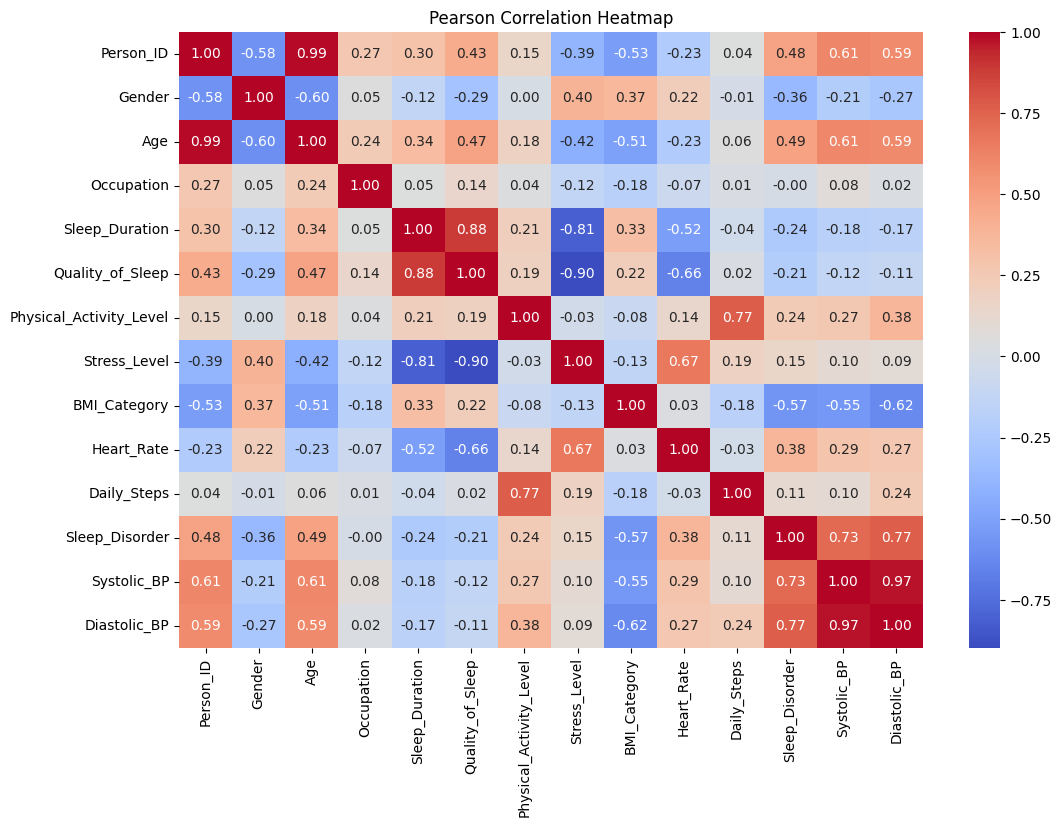

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Pearson Correlation Heatmap")
plt.show()

The following code is irrelevant to the requested project. It's just an attempt to create a matrix that includes the information about correlation between columns of data, for every possible pair of columns, taking into consideration the different types of random variables that may be present. Different variables ask for different methods to compute the correlation coefficient.

To crate a correlation matrix, we have to consider different methods to calculate it depending on the types of the two variables that we compare.

All possible combinations of variable types are listed below, grouped by the preferred method to compute their correlation coefficient.


1. Spearman’s Rank Correlation:
  *  Binary Nominal + Ordinal
  *  Non-Binary Nominal + Ordinal
  *  Ordinal + Ordinal
  *  Ordinal + Ratio
  *  Ordinal + Interval
  *  Ratio + Ratio
  *  Ratio + Interval
  *  Interval + Interval

2. Kendall’s Tau:
  *  Binary Nominal + Ordinal
  *  Non-Binary Nominal + Ordinal
  *  Ordinal + Ordinal
  *  Ordinal + Ratio
  *  Ordinal + Interval
  *  Ratio + Ratio
  *  Interval + Interval

3. Point-Biserial Correlation:
  *  Binary Nominal + Ratio
  *  Binary Nominal + Interval

4. Phi Coefficient:
  *  Binary Nominal + Binary Nominal

5. Chi-Square Test of Independence:
  *  Binary Nominal + Non-Binary Nominal
  *  Non-Binary Nominal + Non-Binary Nominal

6. Cramér’s V:
  *  Non-Binary Nominal + Non-Binary Nominal

7. Kruskal-Wallis Test:
  *  Non-Binary Nominal + Ratio
  *  Non-Binary Nominal + Interval

8. ANOVA:
  *  Non-Binary Nominal + Ratio
  *  Non-Binary Nominal + Interval


In [ ]:
def get_var_type(column_name):
  if column_name in binary_var_columns:
    return 'binary nominal'
  elif column_name in nominal_var_columns:
    return 'nominal'
  elif column_name in ordinal_var_columns:
    return 'ordinal'
  elif column_name in ratio_var_columns:
    return 'ratio'
  elif column_name in interval_var_columns:
    return 'interval'

In [ ]:
def get_analysis_method(column_1_name, column_2_name):
  analysis_method = ""

  # Spearman’s Rank Correlation:
  #   -> Binary Nominal + Ordinal
  #   -> Non-Binary Nominal + Ordinal
  #   -> Ordinal + Ordinal
  #   -> Ordinal + Ratio
  #   -> Ordinal + Interval
  #   -> Ratio + Ratio
  #   -> Ratio + Interval
  #   -> Interval + Interval
  if (0
        or (column_1_name in binary_var_columns and column_2_name in ordinal_var_columns) or (column_2_name in binary_var_columns and column_1_name in ordinal_var_columns)
        or (column_1_name in nominal_var_columns and column_2_name in ordinal_var_columns) or (column_2_name in nominal_var_columns and column_1_name in ordinal_var_columns)
        or (column_1_name in ordinal_var_columns and column_2_name in ordinal_var_columns) or (column_2_name in ordinal_var_columns and column_1_name in ordinal_var_columns)
        or (column_1_name in ordinal_var_columns and column_2_name in ratio_var_columns) or (column_2_name in ordinal_var_columns and column_1_name in ratio_var_columns)
        or (column_1_name in ordinal_var_columns and column_2_name in interval_var_columns) or (column_2_name in ordinal_var_columns and column_1_name in interval_var_columns)
        or (column_1_name in ratio_var_columns and column_2_name in ratio_var_columns) or (column_2_name in ratio_var_columns and column_1_name in ratio_var_columns)
        or (column_1_name in ratio_var_columns and column_2_name in interval_var_columns) or (column_2_name in ratio_var_columns and column_1_name in interval_var_columns)
        or (column_1_name in interval_var_columns and column_2_name in interval_var_columns) or (column_2_name in interval_var_columns and column_1_name in interval_var_columns)
      ):
    analysis_method = "Spearman's rho"
# Point-Biserial Correlation:
#   -> Binary Nominal + Ratio
#   -> Binary Nominal + Interval
  elif (0
        or (column_1_name in binary_var_columns and column_2_name in ratio_var_columns) or (column_2_name in binary_var_columns and column_1_name in ratio_var_columns)
        or (column_1_name in binary_var_columns and column_2_name in interval_var_columns) or (column_2_name in binary_var_columns and column_1_name in interval_var_columns)
  ):
    analysis_method = "Point-Biserial"
# Phi Coefficient:
#   -> Binary Nominal + Binary Nominal
  elif (
        (column_1_name in binary_var_columns and column_2_name in binary_var_columns) or (column_2_name in binary_var_columns and column_1_name in binary_var_columns)
  ):
    analysis_method = "Phi coefficient"
# Chi-Square Test of Independence:
#   -> Binary Nominal + Non-Binary Nominal
#   -> Non-Binary Nominal + Non-Binary Nominal
  elif (0
        or (column_1_name in binary_var_columns and column_2_name in nominal_var_columns) or (column_2_name in binary_var_columns and column_1_name in nominal_var_columns)
        or (column_1_name in nominal_var_columns and column_2_name in nominal_var_columns) or (column_2_name in nominal_var_columns and column_1_name in nominal_var_columns)
  ):
    analysis_method = "Chi-Square"
# Cramér’s V:
#   -> Non-Binary Nominal + Non-Binary Nominal
  elif (
        (column_1_name in nominal_var_columns and column_2_name in nominal_var_columns) or (column_2_name in nominal_var_columns and column_1_name in nominal_var_columns)
  ):
    analysis_method = "Cramér's V"
# Kruskal-Wallis Test:
#   -> Non-Binary Nominal + Ratio
#   -> Non-Binary Nominal + Interval
  elif (0
        or (column_1_name in nominal_var_columns and column_2_name in ratio_var_columns) or (column_2_name in nominal_var_columns and column_1_name in ratio_var_columns)
        or (column_1_name in nominal_var_columns and column_2_name in interval_var_columns) or (column_2_name in nominal_var_columns and column_1_name in interval_var_columns)
  ):
    analysis_method = "Kruskal-Wallis"
# ANOVA:
#   -> Non-Binary Nominal + Ratio
#   -> Non-Binary Nominal + Interval
  elif (0
        or (column_1_name in nominal_var_columns and column_2_name in ratio_var_columns) or (column_2_name in nominal_var_columns and column_1_name in ratio_var_columns)
        or (column_1_name in nominal_var_columns and column_2_name in interval_var_columns) or (column_2_name in nominal_var_columns and column_1_name in interval_var_columns)
  ):
    analysis_method = "ANOVA"
  else:
    analysis_method = "Method not found"

  return analysis_method

In [ ]:
def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()  # total number of observations
    min_dim = min(confusion_matrix.shape) - 1  # minimum of (k-1) and (r-1)
    return np.sqrt(chi2 / (n * min_dim))

In [ ]:
# Text formatting constants
red_bold_text = "\033[1;31m"
blue_bold_text = "\033[1;34m"

red_underlined_text = "\033[1;4;31m"
blue_underlined_text = "\033[1;4;34m"

green_text_box = "\033[1;42;30m"
reset_color = "\033[0m"

r_width = 38

correlation_matrix = { y:{x:0} for x in df_preprocessed.columns[1:] for y in df_preprocessed.columns[1:]}

# Actual computing of correlation coefficient

for column_1_name in df_preprocessed.columns[1:]:
  for column_2_name in df_preprocessed.columns[1:]: # for column_2_name in df_preprocessed.columns[(df_preprocessed.columns.get_loc(column_1_name)+1):]:

    method = get_analysis_method(column_1_name, column_2_name)
    # print(f"{column_1_name} ({red_underlined_text}{get_var_type(column_1_name)}{reset_color})\t{column_2_name} ({blue_underlined_text}{get_var_type(column_2_name)}{reset_color})\t\t\t{green_text_box}{method}{reset_color}")

    if column_1_name == column_2_name:
      correlation_matrix[column_1_name][column_2_name] = 1
      continue

    if method == "Spearman's rho":
      # print(f"**** column_1_name: {df_preprocessed[column_1_name].value_counts()},\n##### column_2_name: {df_preprocessed[column_2_name].value_counts()}")

      correlation_coef, p_value = spearmanr(df_preprocessed[column_1_name], df_preprocessed[column_2_name])
      correlation_matrix[column_1_name][column_2_name] = correlation_coef
      # print(f"{'Using Spearman’s Rank Correlation:'<{r_width}} ({red_bold_text}{column_1_name}: {red_underlined_text}{get_var_type(column_1_name)}{reset_color} and {blue_bold_text}{column_2_name}: {blue_underlined_text}{get_var_type(column_2_name)}{reset_color})", end="\t")
      # print(f"Spearman’s Rho: {green_text_box}{correlation_coef}{reset_color} , p-value: {green_text_box}{p_value}{reset_color}\n", end="")

    elif method == "Point-Biserial":
      r_pb, p_value = pointbiserialr(df_preprocessed[column_1_name], df_preprocessed[column_2_name])
      correlation_matrix[column_1_name][column_2_name] = r_pb
      # print(f"{'Using Point-Biserial:'<{r_width}} ({red_bold_text}{column_1_name}: {red_underlined_text}{get_var_type(column_1_name)}{reset_color} and {blue_bold_text}{column_2_name}: {blue_underlined_text}{get_var_type(column_2_name)}{reset_color})", end="\t")
      # print(f"Coefficient: {green_text_box}{r_pb}{reset_color} , p-value: {green_text_box}{p_value}{reset_color}\n", end="")

    elif method == "Phi coefficient":
      contingency_table = pd.crosstab(df_preprocessed[column_1_name], df_preprocessed[column_2_name])
      chi2, p_value, dof, expected = chi2_contingency(contingency_table)
      phi = np.sqrt(chi2 / df.shape[0])
      correlation_matrix[column_1_name][column_2_name] = phi
      # print(f"{'Using Phi coefficient method:'<{r_width}} ({red_bold_text}{column_1_name}: {red_underlined_text}{get_var_type(column_1_name)}{reset_color} and {blue_bold_text}{column_2_name}: {blue_underlined_text}{get_var_type(column_2_name)}{reset_color})", end="\t")
      # print(f"Phi coefficient: {green_text_box}{phi}{reset_color}\n", end="")

    elif method == "Chi-Square":
      contingency_table = pd.crosstab(df_preprocessed[column_1_name], df_preprocessed[column_2_name])
      chi2, p_value, dof, expected = chi2_contingency(contingency_table)
      correlation_matrix[column_1_name][column_2_name] = chi2
      # print(f"{'Using Chi-Square method:'<{r_width}} ({red_bold_text}{column_1_name}: {red_underlined_text}{get_var_type(column_1_name)}{reset_color} and {blue_bold_text}{column_2_name}: {blue_underlined_text}{get_var_type(column_2_name)}{reset_color})", end="\t")
      # print(f"Chi squared value: {green_text_box}{chi2}{reset_color} , p-value: {green_text_box}{p_value}{reset_color}\n", end="")

    elif method == "Cramér's V":
      contingency_table = pd.crosstab(df_preprocessed[column_1_name], df_preprocessed[column_2_name])
      cramers_v_value = cramers_v(contingency_table)
      correlation_matrix[column_1_name][column_2_name] = cramers_v_value
      # print(f"{'Using Cramér’s V method:'<{r_width}} ({red_bold_text}{column_1_name}: {red_underlined_text}{get_var_type(column_1_name)}{reset_color} and {blue_bold_text}{column_2_name}: {blue_underlined_text}{get_var_type(column_2_name)}{reset_color})", end="\t")
      # print(f"Cramer's V value: {green_text_box}{cramers_v_value}{reset_color}\n", end="")

    elif method == "Kruskal-Wallis":
      statistic, p_value = kruskal(df_preprocessed[column_1_name], df_preprocessed[column_2_name])
      correlation_matrix[column_1_name][column_2_name] = statistic
      # print(f"{'Using Kruskal-Wallis V method:'<{r_width}} ({red_bold_text}{column_1_name}: {red_underlined_text}{get_var_type(column_1_name)}{reset_color} and {blue_bold_text}{column_2_name}: {blue_underlined_text}{get_var_type(column_2_name)}{reset_color})", end="\t")
      # print(f"Statistic: {green_text_box}{statistic}{reset_color} , p-value: {green_text_box}{p_value}{reset_color}\n", end="")

    elif method == "ANOVA":
      f_statistic, p_value = f_oneway(df_preprocessed[column_1_name], df_preprocessed[column_2_name])
      correlation_matrix[column_1_name][column_2_name] = f_statistic
      # print(f"{'Using ANOVA method:'<{r_width}} ({red_bold_text}{column_1_name}: {red_underlined_text}{get_var_type(column_1_name)}{reset_color} and {blue_bold_text}{column_2_name}: {blue_underlined_text}{get_var_type(column_2_name)}{reset_color})", end="\t")
      # print(f"F statistic: {green_text_box}{f_statistic}{reset_color} , p-value: {green_text_box}{p_value}{reset_color}\n", end="")

    else:
      pass
      # print("{Method not found")


def normalization(value, col_name):

  stacked = correlation_matrix.stack().reset_index(drop=True)
  Q1 = stacked.quantile(0.25)
  Q3 = stacked.quantile(0.75)
  IQR = Q3 - Q1

  is_outlier = (value < Q1 - 1.5 * IQR) or (value > Q3 + 1.5 * IQR)

  if is_outlier:
    return value/correlation_matrix[col_name].max() # stacked.median()
  else:
    return value

  # median = correlation_matrix[col_name].median()
  # if median == 0:
  #   return 10e5
  # else:
  #   return value/median

# def normalization(value, col_name):
#   range = correlation_matrix[col_name].max() - correlation_matrix[col_name].min()
#   if range == 0:
#     return 10e5
#   else:
#     return value/range

# def normalization(value, col_name):
#   infimum = correlation_matrix[col_name].max()
#   if infimum == 0:
#     return 10e5
#   else:
#     return value/infimum

correlation_matrix = pd.DataFrame(correlation_matrix, columns=df_preprocessed.columns[1:], index=df_preprocessed.columns[1:])

# Kinda normalize each value by dividing with a number that is a function of column's data
correlation_matrix = correlation_matrix.apply(lambda col: col.apply(lambda value: normalization(value, col.name)))
correlation_matrix


,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,Systolic_BP,Diastolic_BP
Gender,1.000000,-0.596358,0.484683,-0.121579,-0.291366,0.001454,0.396018,0.367997,0.217105,-0.014509,0.093527,-0.210527,-0.268378
Age,-0.596358,1.000000,0.993671,0.312369,0.417810,0.135680,-0.425622,-0.549860,-0.254364,-0.041872,0.992297,0.600480,0.559674
Occupation,1.000000,0.975580,1.000000,0.346011,0.378910,0.975496,0.028435,-0.101061,0.975474,0.975471,0.725677,0.975480,0.975425
Sleep_Duration,-0.121579,0.312369,0.352469,1.000000,0.887398,0.209235,-0.810633,0.307441,-0.608920,0.010087,0.992416,-0.168545,-0.164657
Quality_of_Sleep,-0.291366,0.417810,0.388933,0.887398,1.000000,0.178466,-0.908147,0.266544,-0.734623,0.022779,1.000000,-0.122359,-0.144573
Physical_Activity_Level,0.001454,0.135680,0.997116,0.209235,0.178466,1.000000,-0.017497,-0.083493,0.160942,0.793976,0.995824,0.273292,0.346004
Stress_Level,0.396018,-0.425622,0.029065,-0.810633,-0.908147,-0.017497,1.000000,-0.120039,0.820297,0.171744,0.995806,0.084832,0.101547
BMI_Category,0.367997,-0.549860,-0.101061,0.307441,0.266544,-0.083493,-0.120039,1.000000,-0.144567,-0.041219,-0.652770,-0.618137,-0.656299
Heart_Rate,0.217105,-0.254364,0.998008,-0.608920,-0.734623,0.160942,0.820297,-0.144567,1.000000,0.093582,0.996737,0.222609,0.244337
Daily_Steps,-0.014509,-0.041872,0.998123,0.010087,0.022779,0.793976,0.171744,-0.041219,0.093582,1.000000,0.996855,0.080451,0.172148


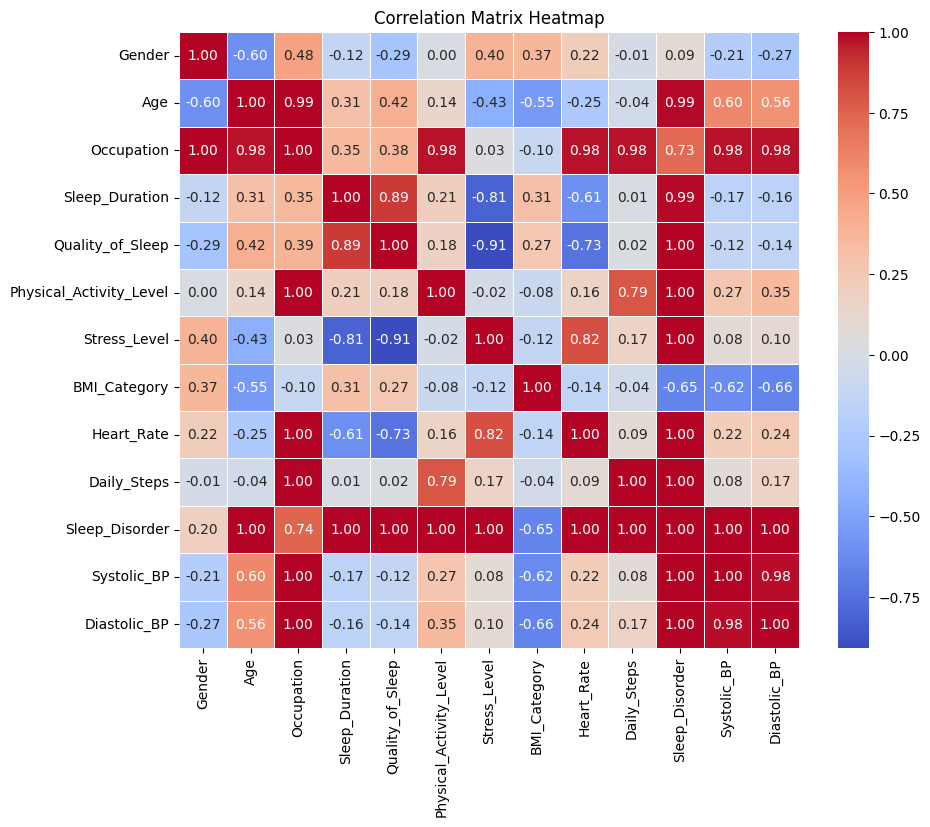

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Display the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


# Question 8

- Create a class named SkewKurtosis that calculates and analyzes the skewness and kurtosis of numerical data columns in a pandas DataFrame. The class should take a pandas DataFrame as an input during initialization.
- Create a method calculate_skew_kurt that calculates both the skewness and kurtosis for each numerical column in the DataFrame.
- Create a method is_symmetrical that takes a column name as input and determines whether the column is approximately symmetrical based on its skewness.
  - A column is considered symmetrical if its skewness is close to 0 (e.g., between -0.5 and 0.5).
  - The method should return True if the column is symmetrical and False otherwise.
- Create a method is_heavy_tailed that takes a column name as input and determines whether the column is heavy-tailed based on its kurtosis.
  - A column is considered heavy-tailed if its kurtosis is significantly higher than 3.
  - The method should return True if the column is heavy-tailed and False otherwise.

  You can search more information on skewness and kurtosis here: [https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis](https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis).

In [ ]:
def SkewKurtosis(df, numerical_columns = None): # If no numerical_columns is specified, Skewness and Kurtosis are computed for ecery column (and it is implied that all colymns are numerical)
  n = len(df) if (numerical_columns is None) else len(numerical_columns)

  mean = np.mean(df) if (numerical_columns is None) else np.mean(df[numerical_columns])
  std = np.std(df) if (numerical_columns is None) else np.std(df[numerical_columns])

  skewness = 0
  kurtosis = 0
  if (numerical_columns is None):
    skewness = n / ((n - 1) * (n - 2)) * np.sum(((df - mean) / std) ** 3)

    mask = df.applymap(lambda x: isinstance(x, str)).any(axis=1) # Identify rows with string values
    rows_without_strings = df[~mask] # Filter rows without string values

    # Safely sum numeric values
    try:
        kurtosis = (1 / n) * (((df - mean) / std) ** 4).sum() - 3
    except TypeError as e:
        print("Error during summation:", e)

  else:
    skewness = n / ((n - 1) * (n - 2)) * np.sum(((df[numerical_columns] - mean) / std) ** 3)

    if isinstance(numerical_columns, str):  # Single column
      mask = df[numerical_columns].apply(lambda x: isinstance(x, str)) # Identify rows with string values
      rows_without_strings = df.loc[~mask, column_name] # Filter rows without string values
    else:  # Multiple columns
      mask = df[numerical_columns].applymap(lambda x: isinstance(x, str)).any(axis=1) # Identify rows with string values
      rows_without_strings = df.loc[~mask, numerical_columns] # Filter rows without string values

    # Safely sum numeric values
    try:
        kurtosis = (1 / n) * (((df[numerical_columns] - mean) / std) ** 4).sum() - 3
    except TypeError as e:
        print("Error during summation:", e)


  return (skewness, kurtosis)


In [ ]:
def is_symmetrical(df, column_name):
  if (column_name not in df.columns):
    return False

  (skewness, _) = SkewKurtosis(df, column_name)

  return True if (abs(skewness) < 0.5) else False

In [ ]:
def is_heavy_tailed(df, column_name):
  (_, kurtosis) = SkewKurtosis(df, column_name)

  return True if (kurtosis > 3) else False

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
SkewKurtosis(df, numerical_columns)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-35-e0b26601a3ed>:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df[numerical_columns].applymap(lambda x: isinstance(x, str)).any(axis=1) # Identify rows with string values


(Person ID                 -2.183820e+04
 Age                       -6.909165e+07
 Sleep Duration            -1.008920e+11
 Quality of Sleep          -2.961671e+10
 Physical Activity Level   -4.703538e+06
 Stress Level              -9.148269e+09
 Heart Rate                -5.767378e+08
 Daily Steps                4.294610e+03
 dtype: float64,
 Person ID                  1.006871e+05
 Age                        4.489048e+09
 Sleep Duration             7.435465e+13
 Quality of Sleep           1.450605e+13
 Physical Activity Level    1.249091e+08
 Stress Level               3.028916e+12
 Heart Rate                 7.600191e+10
 Daily Steps                1.241226e+04
 dtype: float64)

In [ ]:
RED_BOLD = "\033[1;31m"
PALE_GREEN = "\033[38;5;120m"
RESET = "\033[0m"
skewness_property = "symmetrical"
kurtosis_property = "heavy-tailed"
true_statement_skewness = f"{PALE_GREEN}is {skewness_property}{RESET}"
false_statement_skewness = f"{RED_BOLD}is NOT {skewness_property}{RESET}"
true_statement_kurtosis = f"{PALE_GREEN}is {kurtosis_property}{RESET}"
false_statement_kurtosis = f"{RED_BOLD}is NOT {kurtosis_property}{RESET}"

In [ ]:
for i in numerical_columns:
  print(f"{i} is {true_statement_skewness if is_symmetrical(df, i) else false_statement_skewness}")

Person ID is is symmetrical
Age is is NOT symmetrical
Sleep Duration is is NOT symmetrical
Quality of Sleep is is NOT symmetrical
Physical Activity Level is is NOT symmetrical
Stress Level is is NOT symmetrical
Heart Rate is is NOT symmetrical
Daily Steps is is NOT symmetrical


In [ ]:
for i in numerical_columns:
  print(f"{i} is {true_statement_kurtosis if is_symmetrical(df, i) else false_statement_kurtosis}")

Person ID is is heavy-tailed
Age is is NOT heavy-tailed
Sleep Duration is is NOT heavy-tailed
Quality of Sleep is is NOT heavy-tailed
Physical Activity Level is is NOT heavy-tailed
Stress Level is is NOT heavy-tailed
Heart Rate is is NOT heavy-tailed
Daily Steps is is NOT heavy-tailed
